<a href="https://colab.research.google.com/github/nan-973/assignment_/blob/main/fish_unsupervised__learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster

### Loading dataset

In [96]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish (2).csv


In [97]:
df_fish=pd.read_csv('fish.csv')
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [98]:
df_fish.columns = ["Species", "F1", "F2", "F3", "F4", "F5", "F6"]

In [99]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  84 non-null     object 
 1   F1       84 non-null     float64
 2   F2       84 non-null     float64
 3   F3       84 non-null     float64
 4   F4       84 non-null     float64
 5   F5       84 non-null     float64
 6   F6       84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


### Pre-processing

In [100]:
df_fish.isnull().sum()

,0
Species,0
F1,0
F2,0
F3,0
F4,0
F5,0
F6,0


In [101]:
df_fish.duplicated().sum()

np.int64(0)

### Outlier Detection and Handling

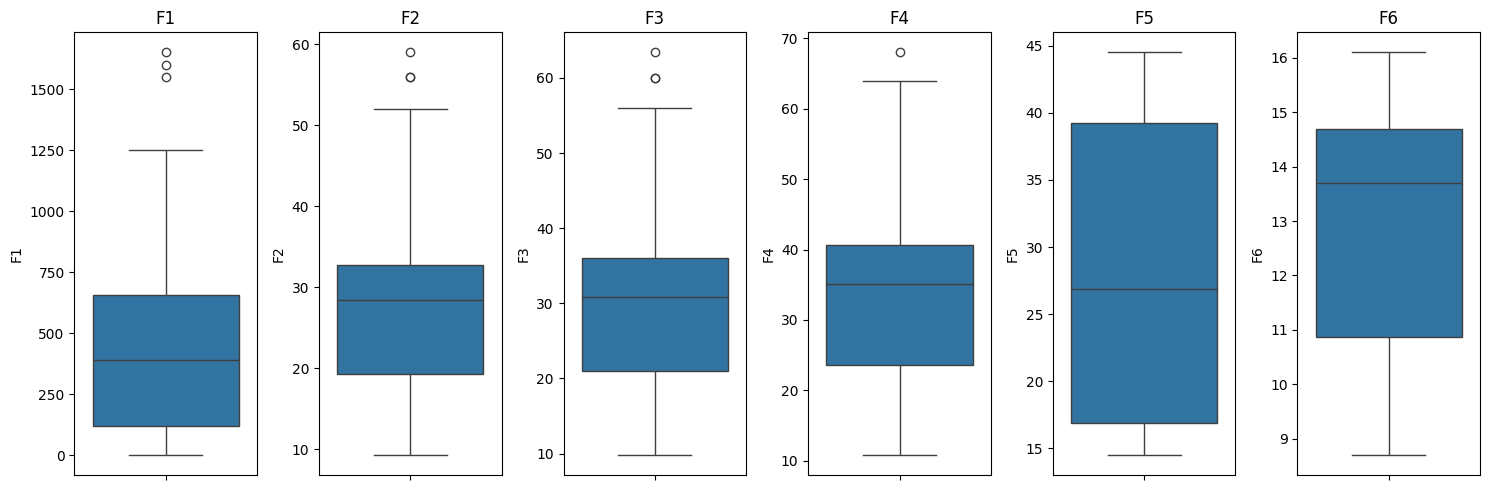

In [102]:
# Select numeric columns only
numeric_cols = df_fish.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_fish[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [103]:
# Select only numeric columns from df
numeric_df = df_fish.select_dtypes(include=['float64', 'int64']).copy()

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Clip outliers
for col in numeric_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    numeric_df[col] = numeric_df[col].clip(lower=lower_bound, upper=upper_bound)

print("Numeric outliers clipped successfully!")

Numeric outliers clipped successfully!


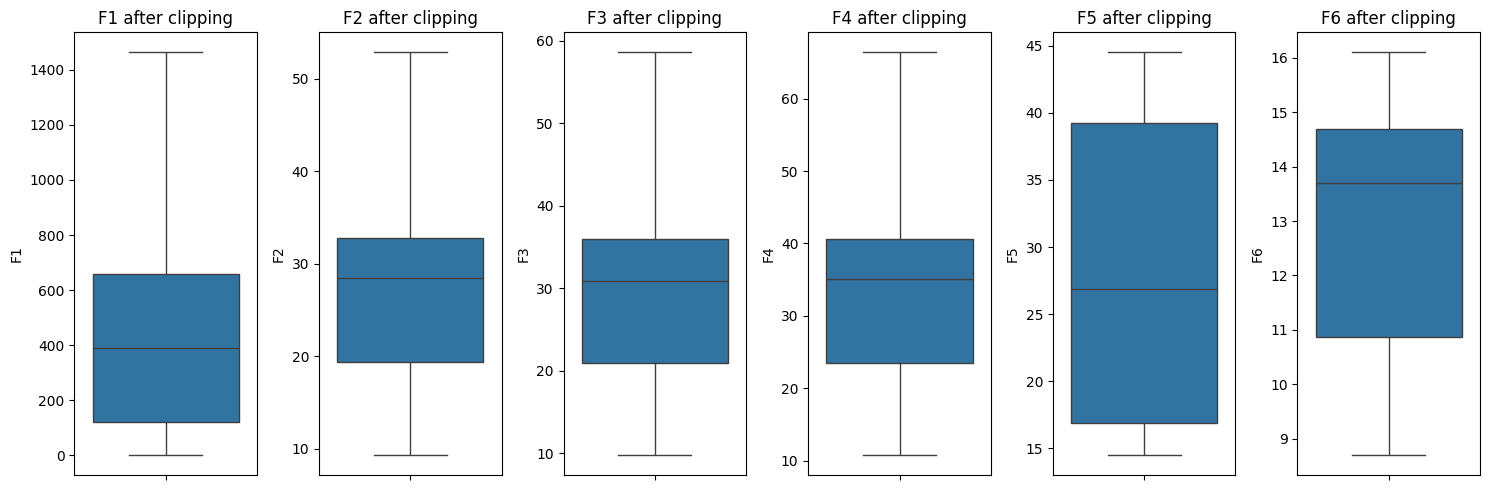

In [104]:
# Boxplot after clipping the outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=numeric_df[col])
    plt.title(f'{col} after clipping')
plt.tight_layout()

### Scaling

In [105]:
numeric_cols = df_fish.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
df_fish[numeric_cols] = scaler.fit_transform(df_fish[numeric_cols])
df_fish.head()

,Species,F1,F2,F3,F4,F5,F6
0,Bream,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320
1,Bream,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494
2,Bream,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099
3,Bream,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494
4,Bream,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297


### Encoding

In [106]:
# One-hot encode the species column
df_fish= pd.get_dummies(df_fish, columns = ['Species'],dtype=int,prefix=['Species'])
df_fish.head()

,F1,F2,F3,F4,F5,F6,Species_Bream,Species_Pike,Species_Roach,Species_Smelt
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320,1,0,0,0
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494,1,0,0,0
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099,1,0,0,0
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494,1,0,0,0
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297,1,0,0,0


## K-Means

In [107]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(df_fish)
  wcss.append(kmeans.inertia_)

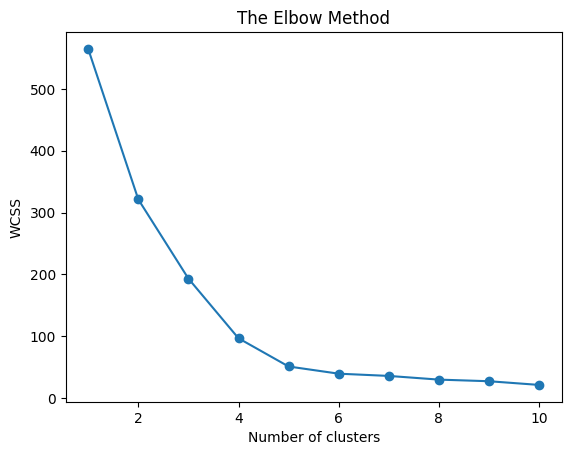

In [108]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(df_fish)

In [110]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,F1,F2,F3,F4,F5,F6,Species_Bream,Species_Pike,Species_Roach,Species_Smelt,Cluster
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320,1,0,0,0,0
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494,1,0,0,0,0
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099,1,0,0,0,0
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494,1,0,0,0,0
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297,1,0,0,0,0


Visualization after clustering

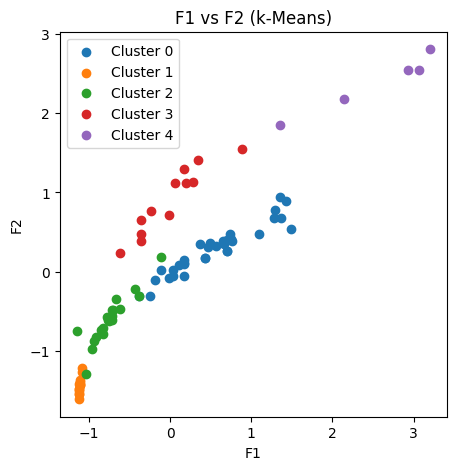

In [111]:
# after clustering
# F1 vs F2
plt.figure(figsize=(5,5))
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['F1'],cluster_data['F2'],label=f'Cluster {i}')
plt.title('F1 vs F2 (k-Means)')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.show()

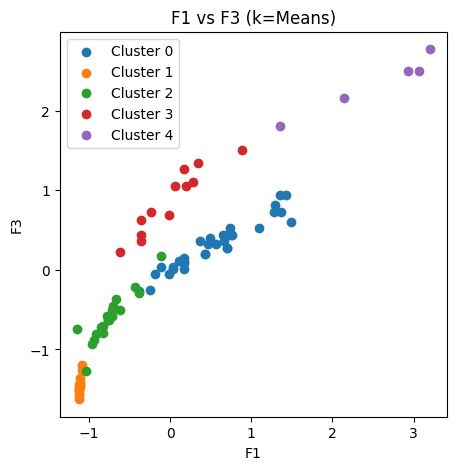

In [112]:
# after clustering
# F1 vs F3
plt.figure(figsize=(5,5))
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['F1'],cluster_data['F3'],label=f'Cluster {i}')
plt.title('F1 vs F3 (k=Means)')
plt.xlabel('F1')
plt.ylabel('F3')
plt.legend()
plt.show()

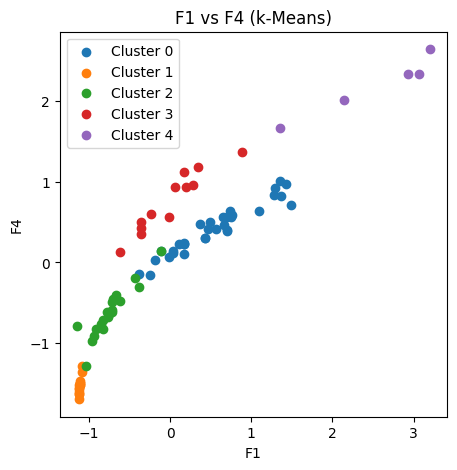

In [113]:
# after clustering
# F1 vs F4
plt.figure(figsize=(5,5))
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['F1'],cluster_data['F4'],label=f'Cluster {i}')
plt.title('F1 vs F4 (k-Means)')
plt.xlabel('F1')
plt.ylabel('F4')
plt.legend()
plt.show()

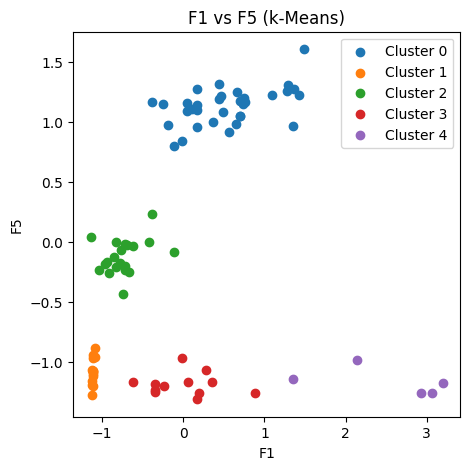

In [114]:
# after clustering
# F1 vs F5
plt.figure(figsize=(5,5))
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['F1'],cluster_data['F5'],label=f'Cluster {i}')
plt.title('F1 vs F5 (k-Means)')
plt.xlabel('F1')
plt.ylabel('F5')
plt.legend()
plt.show()

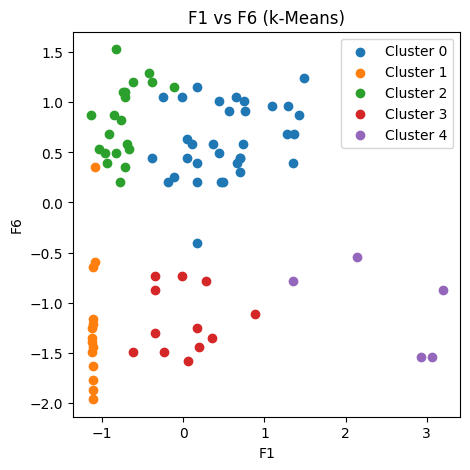

In [115]:
# after clustering
# F1 vs F6
plt.figure(figsize=(5,5))
for i in range(5):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['F1'],cluster_data['F6'],label=f'Cluster {i}')
plt.title('F1 vs F6 (k-Means)')
plt.xlabel('F1')
plt.ylabel('F6')
plt.legend()
plt.show()

Prediction of cluster

In [116]:
def predict_fish_cluster(features):
    # Create DataFrame with correct feature names
    feature_names = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                     'Species_Bream', 'Species_Pike', 'Species_Roach', 'Species_Smelt']

    new_data_df = pd.DataFrame([features], columns=feature_names)
    cluster = kmeans.predict(new_data_df)
    return int(cluster[0])

sample = [-0.3, -0.2, -0.27, -0.15, 1.17, 0.44, 1, 0, 0, 0]
print("Predicted Cluster:", predict_fish_cluster(sample))

Predicted Cluster: 0


## Agglomerative Hierarchial Clustering

In [117]:
ag_cluster = linkage(df_fish,method='ward')

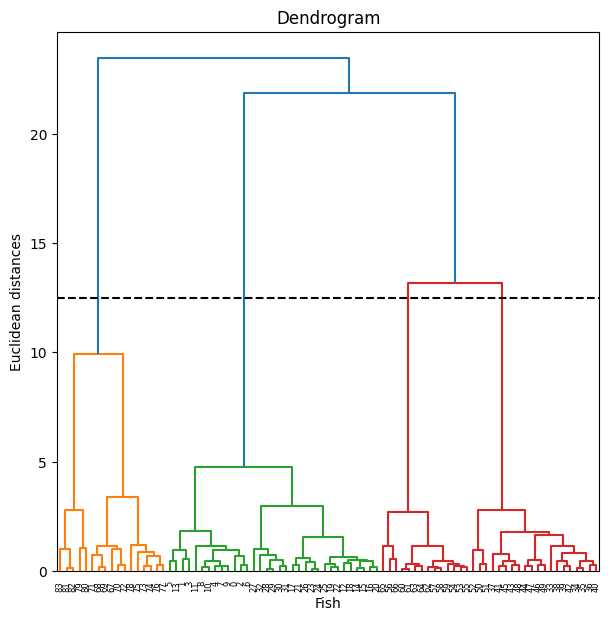

In [118]:
plt.figure(figsize=(7,7))
dendrogram(ag_cluster)
plt.axhline(y=12.5,color='black',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Fish')
plt.ylabel('Euclidean distances')
plt.show()

In [119]:
cluster_labels = fcluster(ag_cluster,t=12.5,criterion='distance')
cluster_labels

df_fish['Cluster_Agglomerative']=cluster_labels
df_fish.head()

,F1,F2,F3,F4,F5,F6,Species_Bream,Species_Pike,Species_Roach,Species_Smelt,Cluster,Cluster_Agglomerative
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320,1,0,0,0,0,2
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494,1,0,0,0,0,2
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099,1,0,0,0,0,2
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494,1,0,0,0,0,2
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297,1,0,0,0,0,2


In [120]:
df_fish['Cluster'].unique()

array([0, 2, 1, 3, 4], dtype=int32)

In [121]:
df_fish['Cluster_Agglomerative'].unique()

array([2, 4, 3, 1], dtype=int32)

Visualization After Clustering

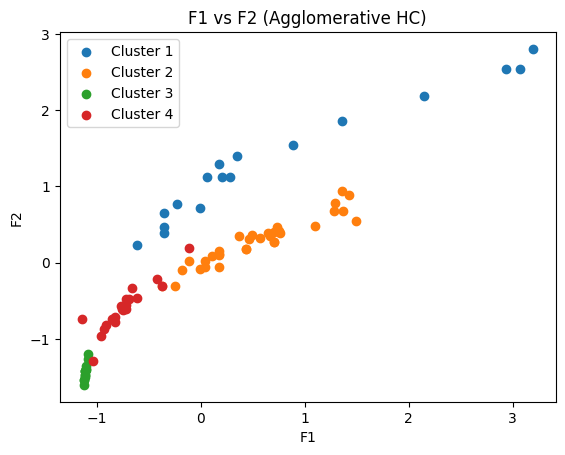

In [122]:
# F1 vs F2
for i in range(1,len(df_fish['Cluster_Agglomerative'].unique())+1):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['F1'],
              cluster_data['F2'],
              label=f'Cluster {i}')
plt.title('F1 vs F2 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend() # to dislplay the label box
plt.show()

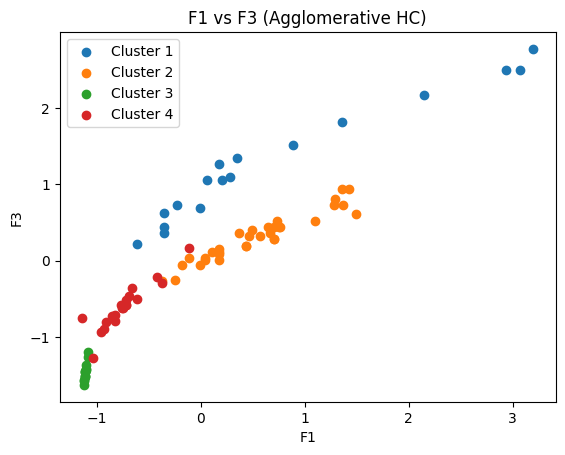

In [123]:
# F1 vs F3
for i in range(1,len(df_fish['Cluster_Agglomerative'].unique())+1):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['F1'],
              cluster_data['F3'],
              label=f'Cluster {i}')
plt.title('F1 vs F3 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F3')
plt.legend() # to dislplay the label box
plt.show()

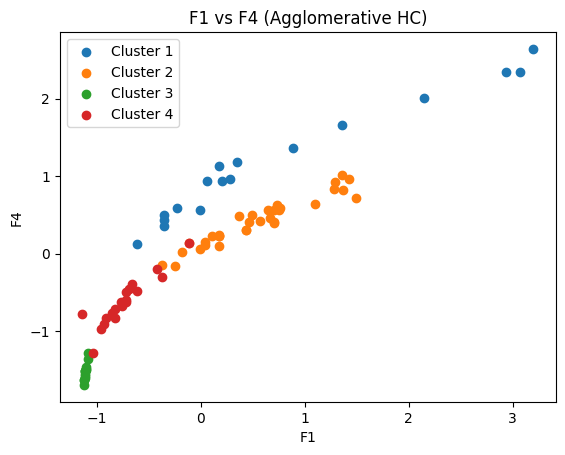

In [124]:
# F1 vs F4
for i in range(1,len(df_fish['Cluster_Agglomerative'].unique())+1):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['F1'],
              cluster_data['F4'],
              label=f'Cluster {i}')
plt.title('F1 vs F4 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F4')
plt.legend() # to dislplay the label box
plt.show()

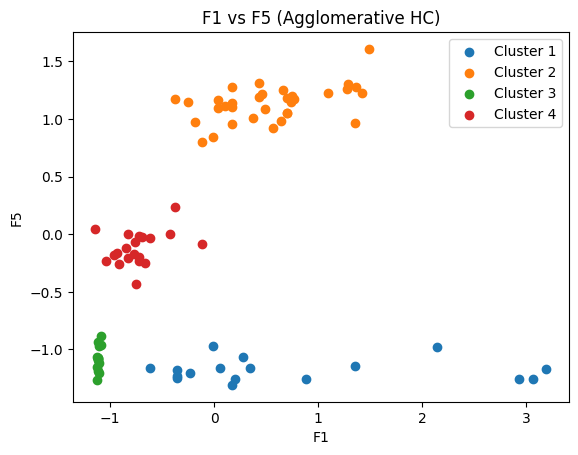

In [125]:
# F1 vs F5
for i in range(1,len(df_fish['Cluster_Agglomerative'].unique())+1):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['F1'],
              cluster_data['F5'],
              label=f'Cluster {i}')
plt.title('F1 vs F5 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F5')
plt.legend() # to dislplay the label box
plt.show()

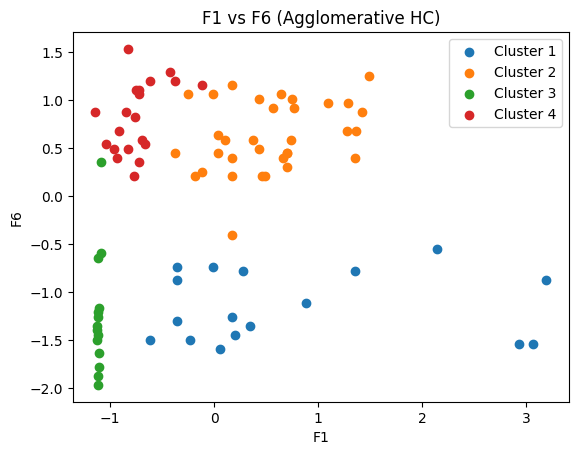

In [126]:
# F1 vs F6
for i in range(1,len(df_fish['Cluster_Agglomerative'].unique())+1):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['F1'],
              cluster_data['F6'],
              label=f'Cluster {i}')
plt.title('F1 vs F6 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F6')
plt.legend() # to dislplay the label box
plt.show()

### Comparison between k-Means Clustering and Agglomerative HC using subplots

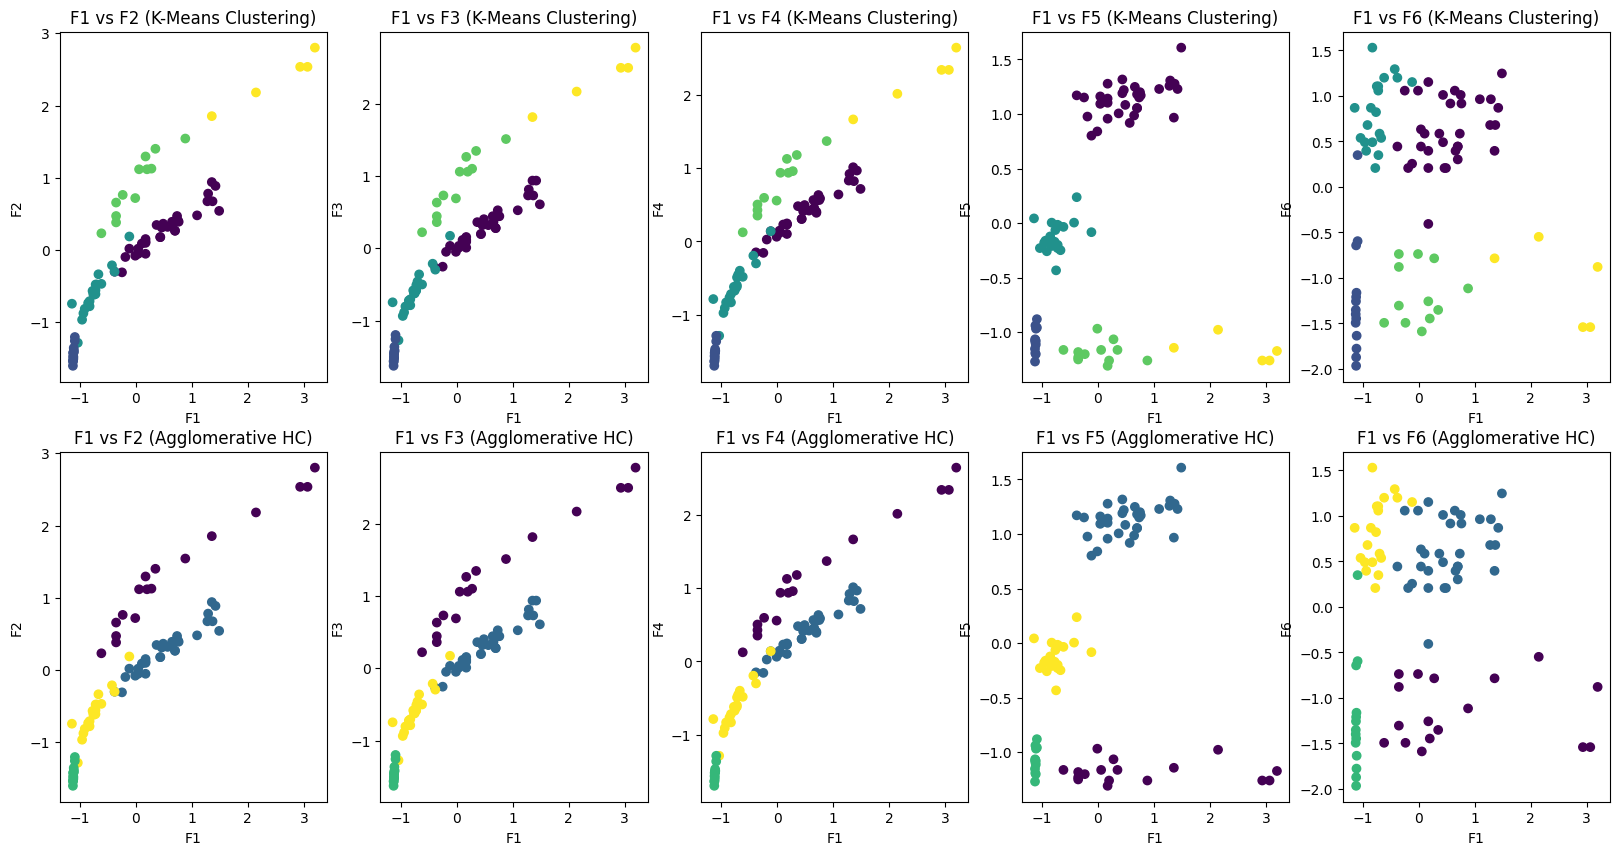

In [127]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.scatter(df_fish['F1'],df_fish['F2'],c=df_fish['Cluster'])
plt.title('F1 vs F2 (K-Means Clustering)')
plt.xlabel('F1')
plt.ylabel('F2')

plt.subplot(2,5,2)
plt.scatter(df_fish['F1'],df_fish['F3'],c=df_fish['Cluster'])
plt.title('F1 vs F3 (K-Means Clustering)')
plt.xlabel('F1')
plt.ylabel('F3')

plt.subplot(2,5,3)
plt.scatter(df_fish['F1'],df_fish['F4'],c=df_fish['Cluster'])
plt.title('F1 vs F4 (K-Means Clustering)')
plt.xlabel('F1')
plt.ylabel('F4')

plt.subplot(2,5,4)
plt.scatter(df_fish['F1'],df_fish['F5'],c=df_fish['Cluster'])
plt.title('F1 vs F5 (K-Means Clustering)')
plt.xlabel('F1')
plt.ylabel('F5')

plt.subplot(2,5,5)
plt.scatter(df_fish['F1'],df_fish['F6'],c=df_fish['Cluster'])
plt.title('F1 vs F6 (K-Means Clustering)')
plt.xlabel('F1')
plt.ylabel('F6')

plt.subplot(2,5,6)
plt.scatter(df_fish['F1'],df_fish['F2'],c=df_fish['Cluster_Agglomerative'])
plt.title('F1 vs F2 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F2')

plt.subplot(2,5,7)
plt.scatter(df_fish['F1'],df_fish['F3'],c=df_fish['Cluster_Agglomerative'])
plt.title('F1 vs F3 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F3')

plt.subplot(2,5,8)
plt.scatter(df_fish['F1'],df_fish['F4'],c=df_fish['Cluster_Agglomerative'])
plt.title('F1 vs F4 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F4')

plt.subplot(2,5,9)
plt.scatter(df_fish['F1'],df_fish['F5'],c=df_fish['Cluster_Agglomerative'])
plt.title('F1 vs F5 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F5')

plt.subplot(2,5,10)
plt.scatter(df_fish['F1'],df_fish['F6'],c=df_fish['Cluster_Agglomerative'])
plt.title('F1 vs F6 (Agglomerative HC)')
plt.xlabel('F1')
plt.ylabel('F6')

plt.show()